In [1]:
from scipy.io import loadmat as _loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# open .mat files
data = _loadmat(r'Dataset\CRISM_labeled_pixels_ratioed.mat')
labs, spectra = [data['pixlabs'], data['pixspec']]

In [2]:
indices = []
value = np.arange(0,39)
master_spectra = []
for val in value:
    indices_ = []
    spectra_ = []
    for i in range(len(labs)):
        if labs[i] == val:
            spectra_.append(spectra[i])
    spectra_ = np.asarray(spectra_)
    master_spectra.append(spectra_)
    print(val)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


In [21]:
FULL_NAMES = {
    3: 'Gypsum',
    4: 'Ferric Hydroxysulfate',
    5: "Hematite",
    6: 'Nontronite',
    7: 'Saponite',
    8: 'Prehnite',  # Prehnite Zeolite
    9: 'Jarosite',
    10: 'Serpentine',
    11: 'Alunite',
    13: 'Ca/Fe CO3',  # Calcite, Ca/Fe carbonate
    14: 'Beidellite',
    15: 'Kaolinite',
    16: 'Bassanite',
    17: 'Epidote',
    18: 'Montmorillonite',
    20: 'Mg Cl salt',  # Mg(ClO3)2.6H2O
    21: 'Halloysite',
    23: 'Illite/Muscovite',
    24: 'Margarite',
    25: 'Analcime',  # Zeolite
    26: 'Monohydrated sulfate',  # Szomolnokite
    30: 'MgCO3',  # Magnesite
    31: 'Chlorite',
    32: 'Clinochlore',
    33: 'Low Ca Pyroxene',
    34: 'Olivine Forsterite',
    35: 'High Ca Pyroxene',
    36: 'Olivine Fayalite',
}

NEW_NAMES = {
    0: 'Gypsum',
    1: 'Ferric Hydroxysulfate',
    2: "Hematite",
    3: 'Nontronite',
    4: 'Saponite',
    5: 'Prehnite',  # Prehnite Zeolite
    6: 'Jarosite',
    7: 'Serpentine',
    8: 'Alunite',
    9: 'Ca/Fe CO3',  # Calcite, Ca/Fe carbonate
    10: 'Beidellite',
    11: 'Kaolinite',
    12: 'Bassanite',
    13: 'Epidote',
    14: 'Montmorillonite',
    15: 'Mg Cl salt',  # Mg(ClO3)2.6H2O
    16: 'Halloysite',
    17: 'Illite/Muscovite',
    18: 'Margarite',
    19: 'Analcime',  # Zeolite
    20: 'Monohydrated sulfate',  # Szomolnokite
    21: 'MgCO3',  # Magnesite
    22: 'Chlorite',
    23: 'Clinochlore',
    24: 'Low Ca Pyroxene',
    25: 'Olivine Forsterite',
    26: 'High Ca Pyroxene',
    27: 'Olivine Fayalite',
}


In [22]:
master_spectra = np.asarray(master_spectra)

selected = list(FULL_NAMES.keys())
print(selected)
# select only the selected indies from master_spectra
master_spectra_selected = master_spectra[selected]

[3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35, 36]


In [23]:
exemplar_spectra = []
for i in range(master_spectra_selected.shape[0]):
    spec_ = master_spectra_selected[i]
    test_spec_ = np.zeros((len(spec_), 240))

    for i in range(len(spec_)):
        test_spec_[i] = spec_[i][4:244]

    # calculate the mean of the spectra
    mean_spec = np.nanmean(test_spec_, axis=0)
    
    exemplar_spectra.append(mean_spec)

In [26]:
exemplar_spectra = np.array(exemplar_spectra)
exemplar_spectra.shape
# save exemplar spectra as csv
np.savetxt('exemplar_spectra.csv', exemplar_spectra, delimiter=',')


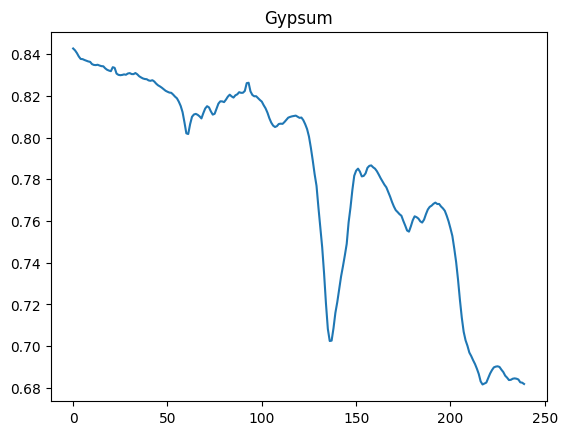

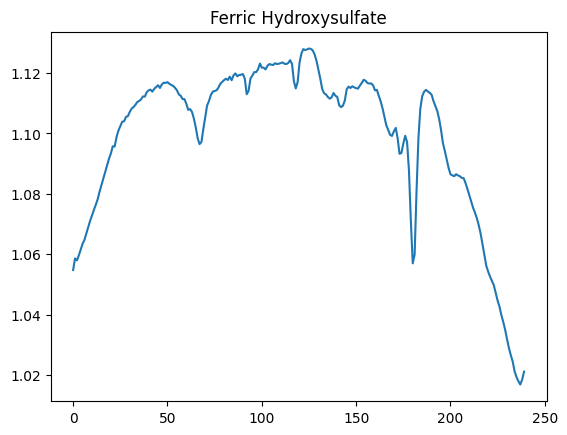

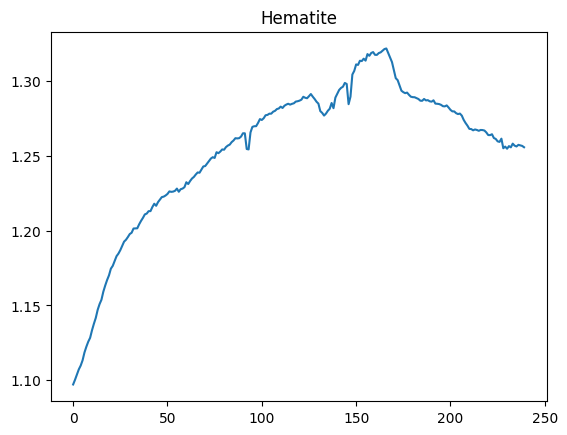

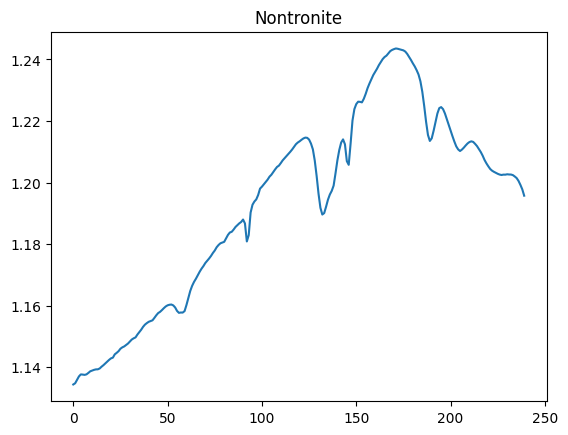

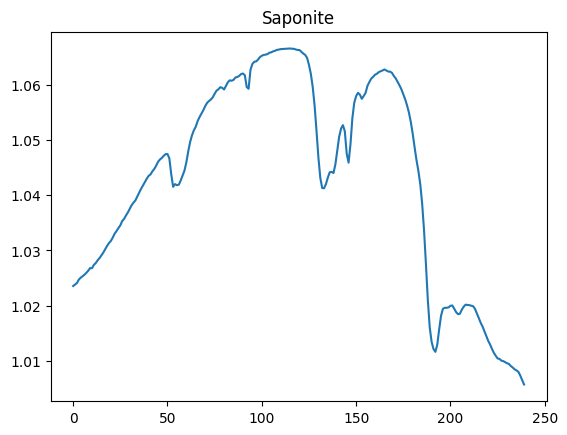

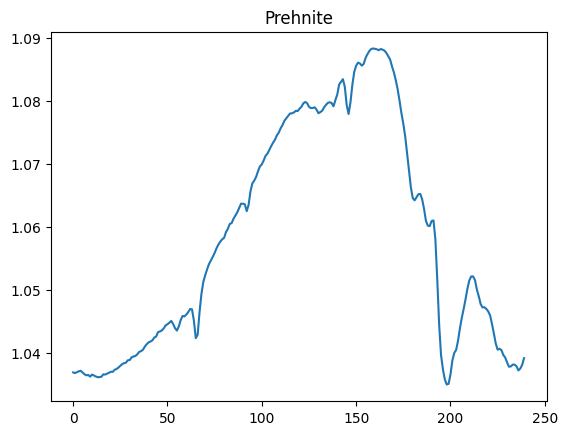

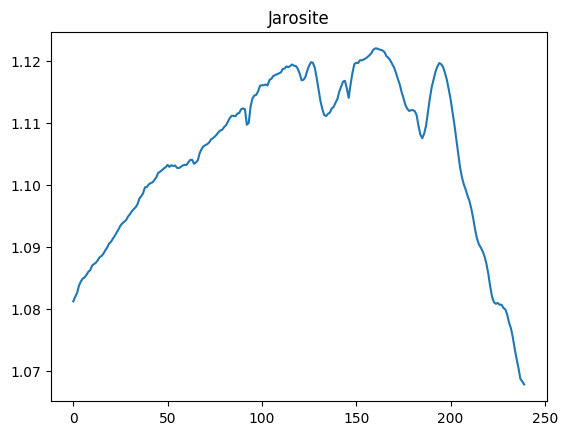

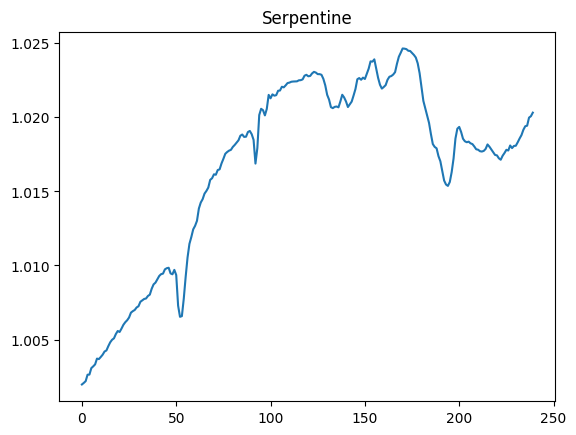

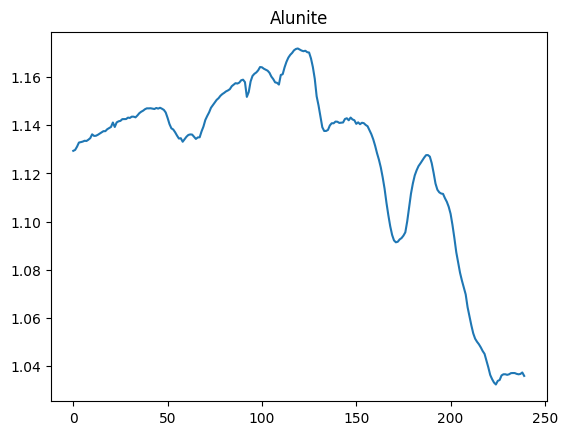

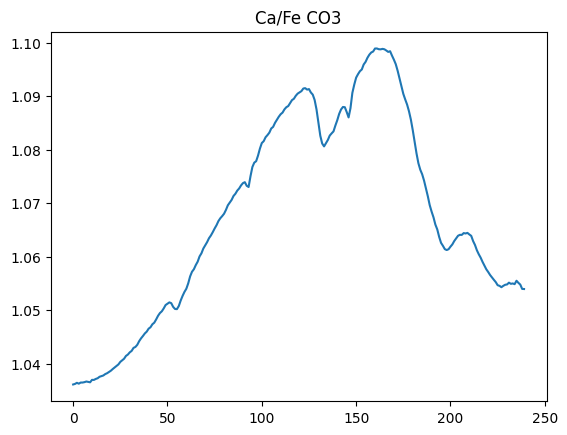

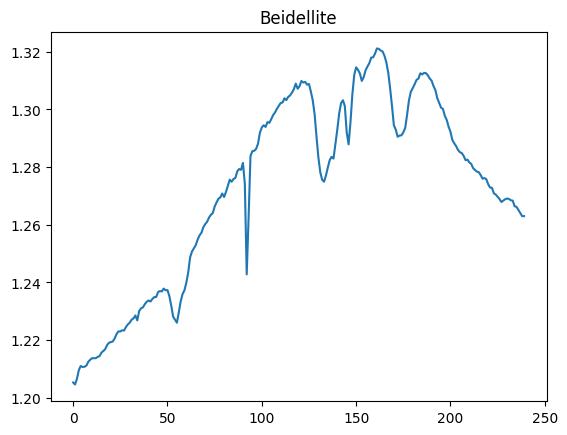

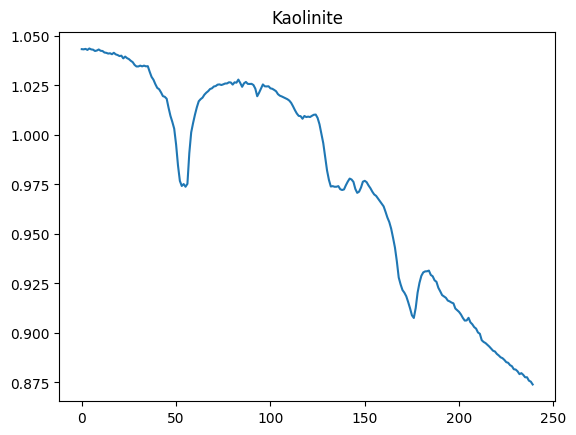

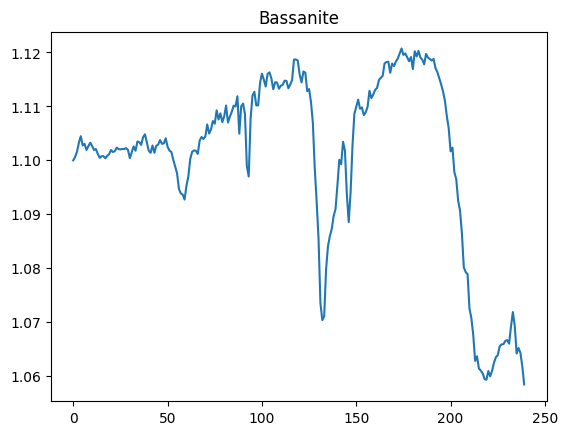

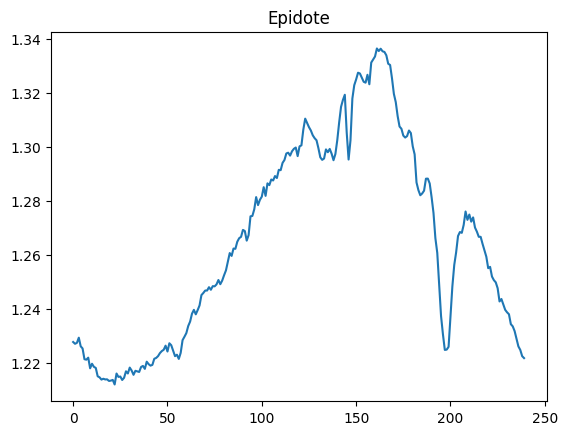

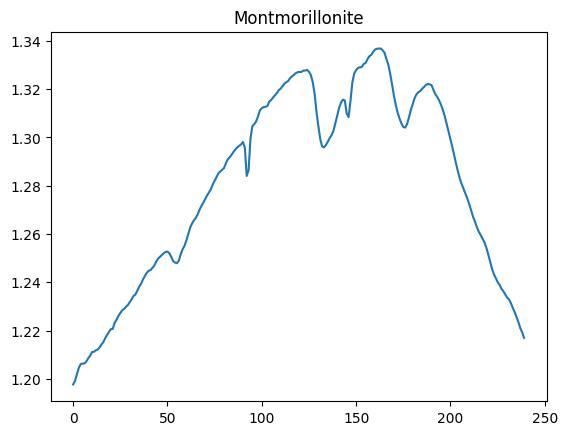

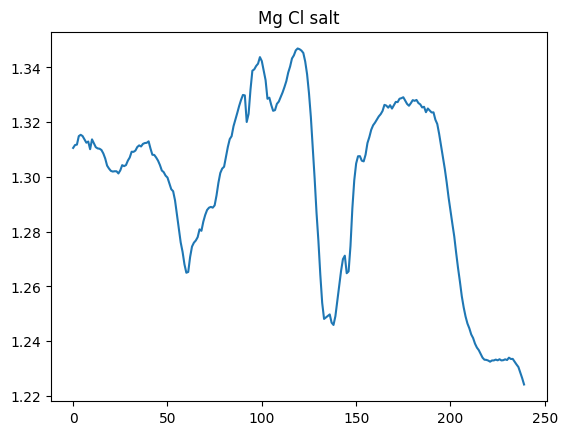

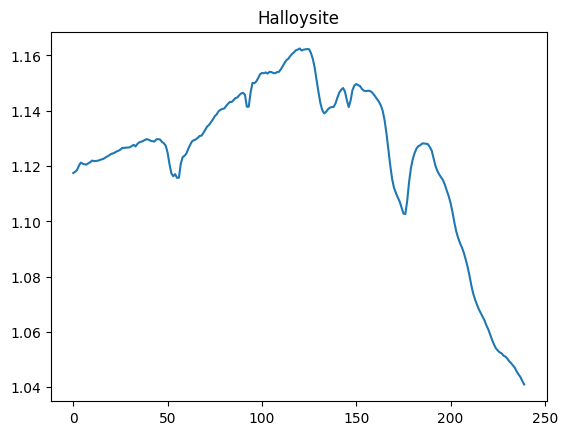

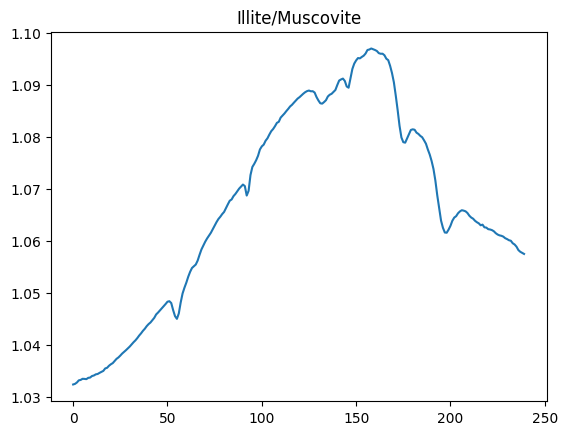

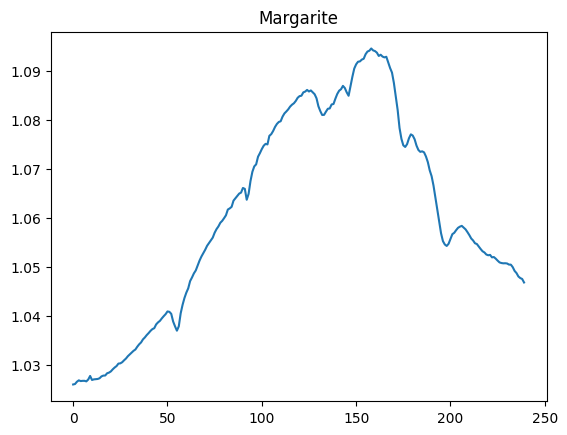

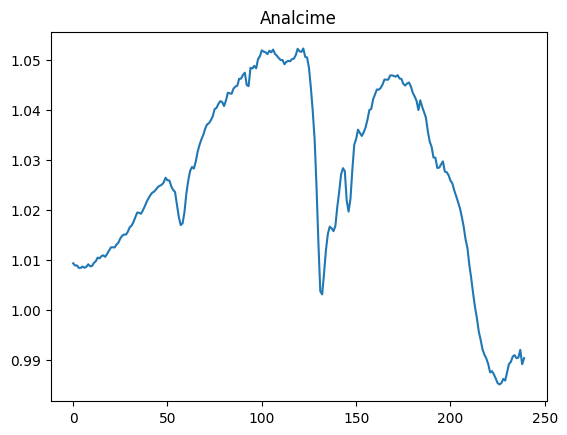

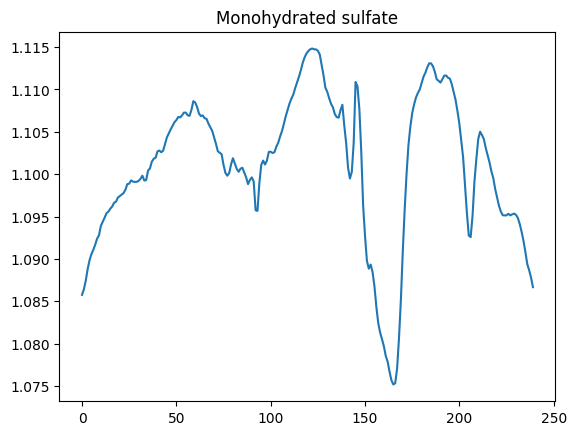

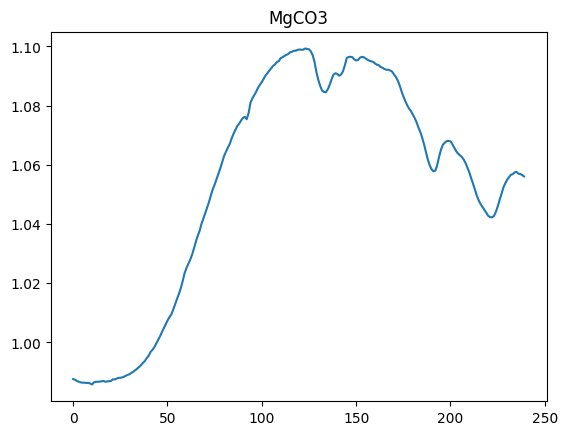

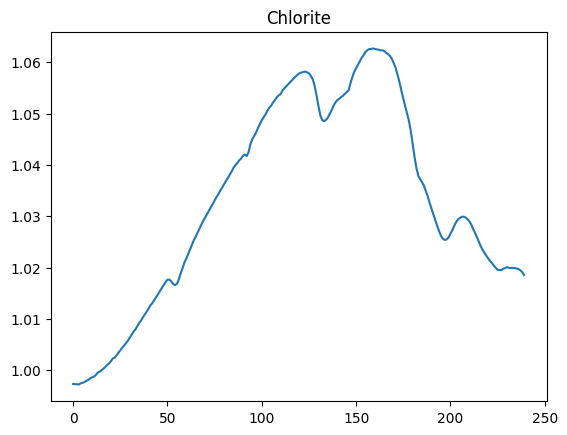

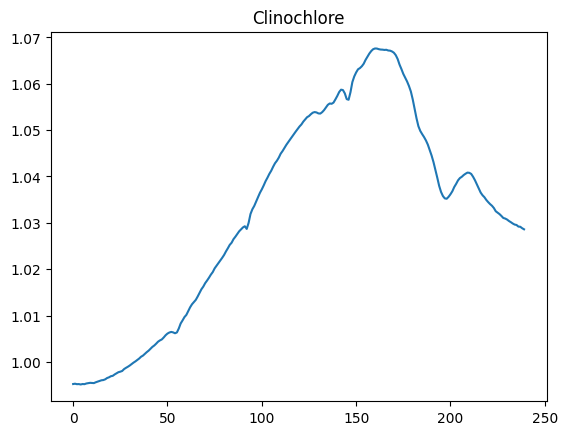

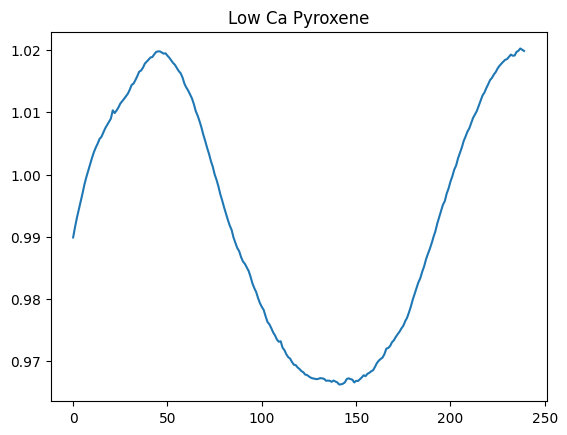

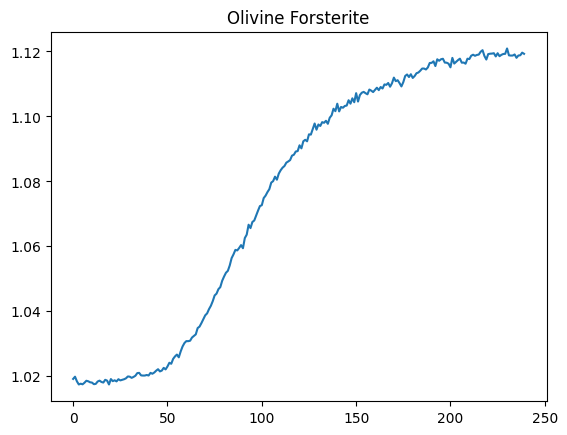

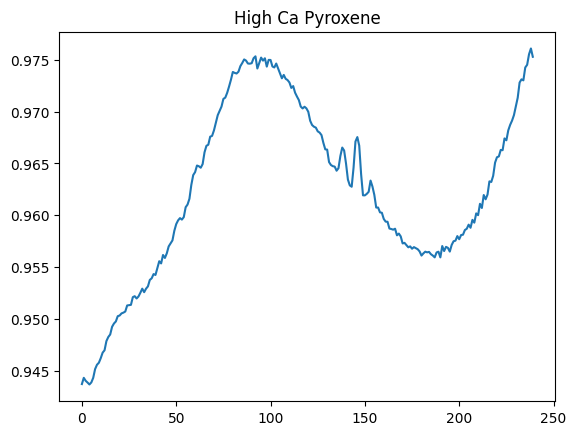

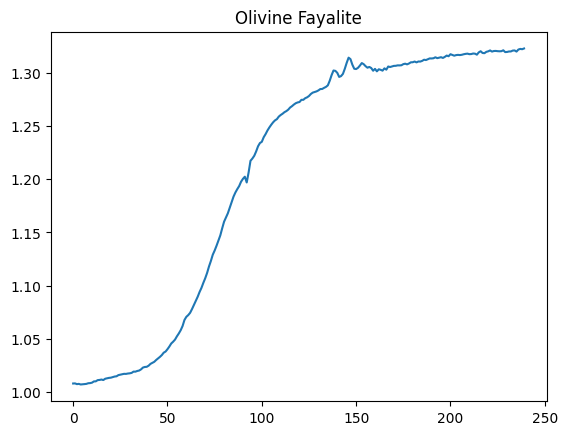

IndexError: index 28 is out of bounds for axis 0 with size 28

In [25]:
for i in range(29):
    plt.plot(exemplar_spectra[i])
    plt.title(list(NEW_NAMES.values())[i])
    plt.show()

In [49]:
# read csv
df = pd.read_csv('exemplar_spectra.csv')
f = np.array(df)
f[1]

array([1.09722057, 1.10037898, 1.10393136, 1.10730243, 1.10983216,
       1.11334735, 1.11857298, 1.12242141, 1.12577509, 1.12838742,
       1.13343122, 1.13776272, 1.14169149, 1.14705784, 1.15088061,
       1.15379152, 1.15919311, 1.16331379, 1.16698551, 1.17011942,
       1.17457325, 1.17646107, 1.1796557 , 1.18290909, 1.18462101,
       1.18694959, 1.18984598, 1.19262457, 1.19385883, 1.19566597,
       1.19768875, 1.19855915, 1.20137723, 1.20149447, 1.20154778,
       1.20423305, 1.20650489, 1.20850909, 1.21080722, 1.21135408,
       1.21297843, 1.21300316, 1.21574879, 1.21793372, 1.21656743,
       1.21904117, 1.22068149, 1.22235971, 1.22268129, 1.22343973,
       1.22446382, 1.2261686 , 1.22587194, 1.22603967, 1.22657779,
       1.22804393, 1.22593869, 1.22764704, 1.22805109, 1.22899414,
       1.23229387, 1.23108977, 1.23311607, 1.23477457, 1.2358434 ,
       1.23746037, 1.2388168 , 1.23865223, 1.24075428, 1.24283835,
       1.2430983 , 1.2447838 , 1.24658408, 1.24810309, 1.24902

In [51]:
master_spectra = np.array(master_spectra)
master_spectra.shape

# create a list of the indices of the master spectra
index_list = []

# loop through master spectra
for i in range(len(master_spectra)):
    # get the length of master_spectra[i] and create a list of that many element of value i
    l = len(master_spectra[i])
    index = [i] * l
    index = np.array(index)
    index_list.append(index)

index_list = np.array(index_list)

C:\Users\jourd\AppData\Local\Temp\ipykernel_17756\3700580443.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  index_list = np.array(index_list)


In [52]:
# flatten the array
flat_index_list = [item for sublist in index_list for item in sublist]
flat_spectra = [item for sublist in master_spectra for item in sublist]


In [53]:
flat_index_list = np.array(flat_index_list)
flat_spectra = np.array(flat_spectra)
flat_spectra = flat_spectra[:,4:244]
flat_index_list.shape,flat_spectra.shape

((492835,), (492835, 240))

In [54]:
import random
# Shuffle 
# Zipping the two lists together
zipped = list(zip(flat_spectra, flat_index_list))

# Shuffling the zipped list
random.shuffle(zipped)

# Unzipping the shuffled list back into two lists
flat_spectra_shuffled, flat_index_shuffled = zip(*zipped)

In [55]:
# reshape the image into a 2D array of pixels
# 562500
flat_spectra_shuffled_ = np.array(flat_spectra_shuffled[:490000])
flat_index_shuffled_ = np.array(flat_index_shuffled[:490000])
flat_spectra_shuffled_img = flat_spectra_shuffled_.reshape((700,700,240))
flat_index_shuffled_img = flat_index_shuffled_.reshape((700,700))

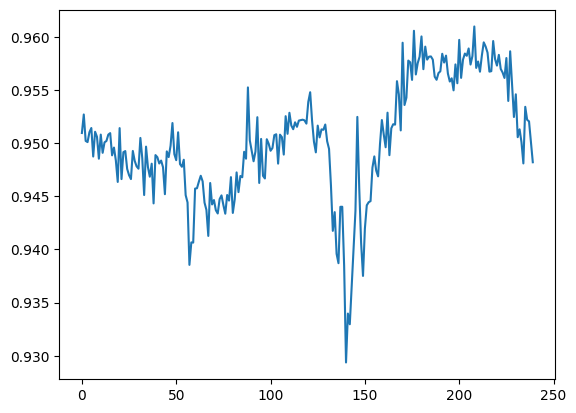

In [11]:
plt.plot(flat_spectra_shuffled_img[195,120])


In [56]:
from spectral.io import envi
# save images to envi
envi.save_image('validation_spectra.hdr', flat_spectra_shuffled_img, dtype=np.float64, force=True, interleave='bil')
envi.save_image('validation_labels.hdr', flat_index_shuffled_img, dtype=np.float64, force=True, interleave='bil')

3


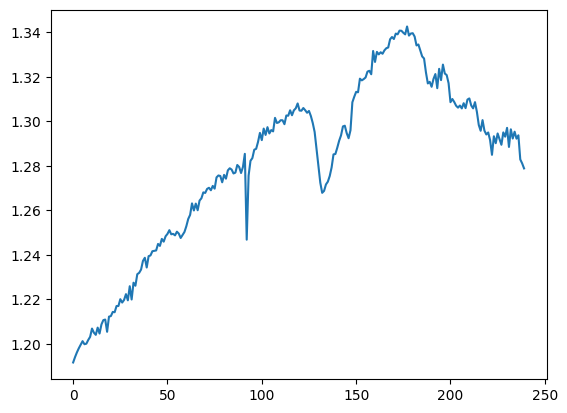

In [16]:
x = envi.open('validation_spectra.hdr')
plt.plot(x[120,100])
print(flat_index_shuffled_img[120,100])

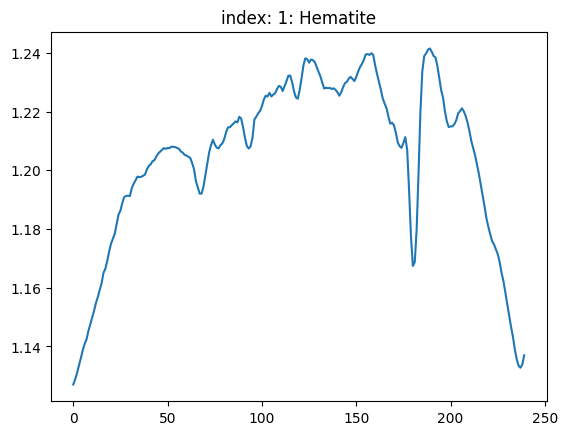

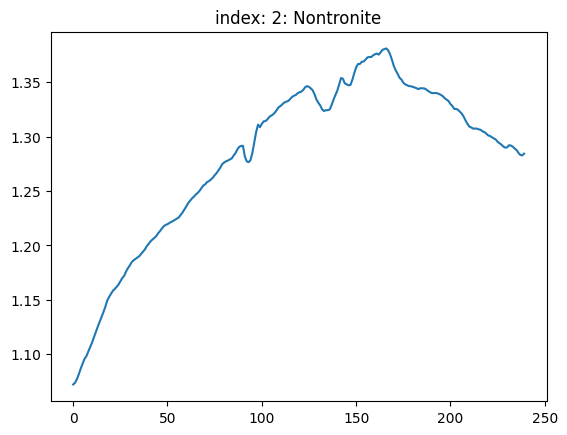

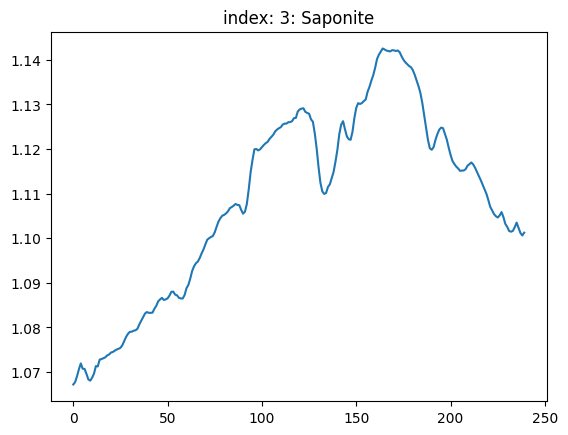

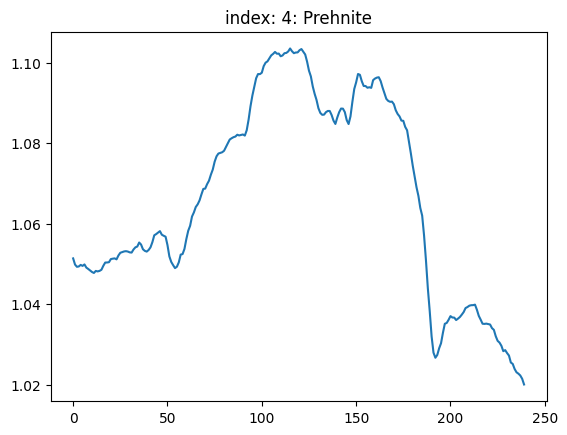

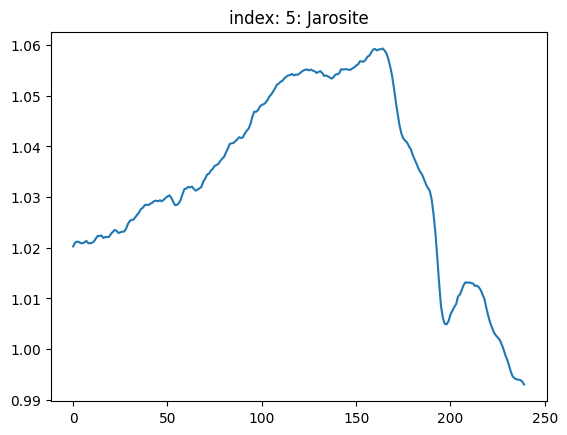

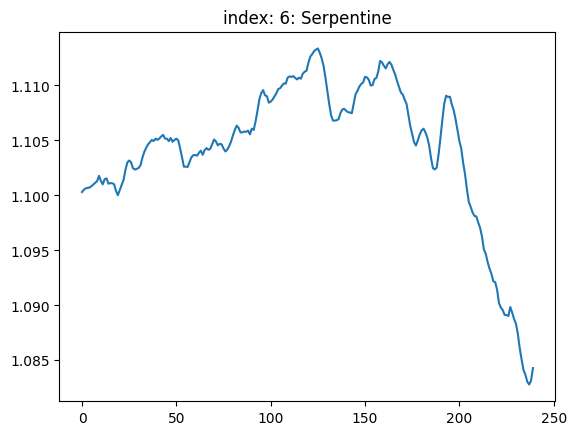

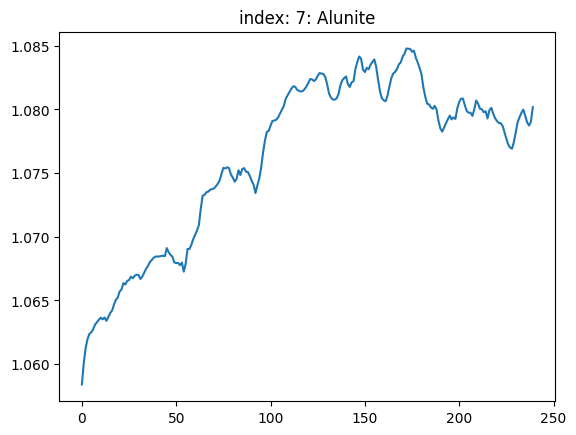

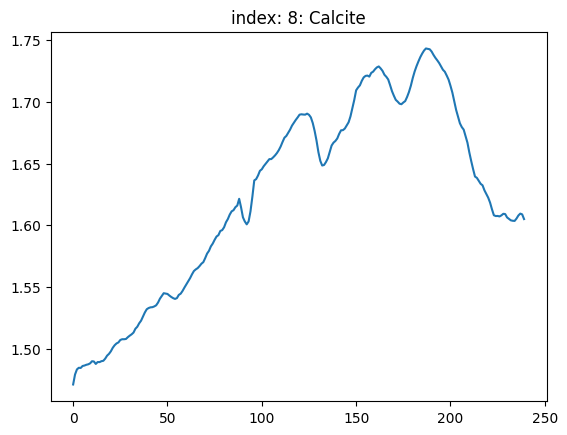

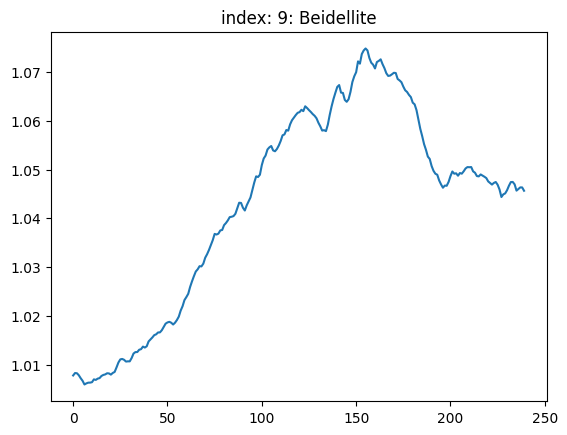

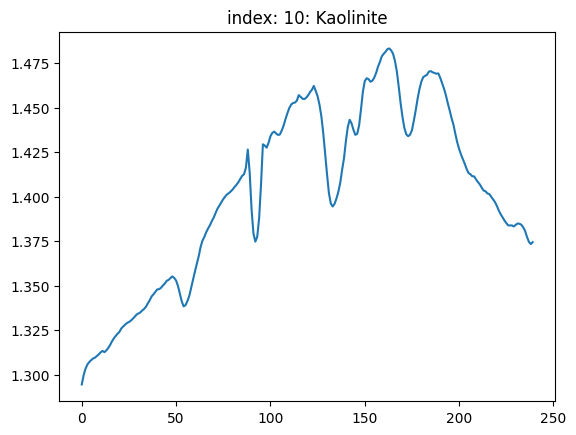

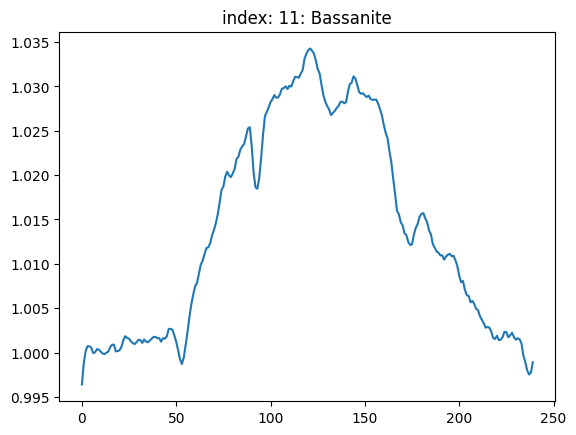

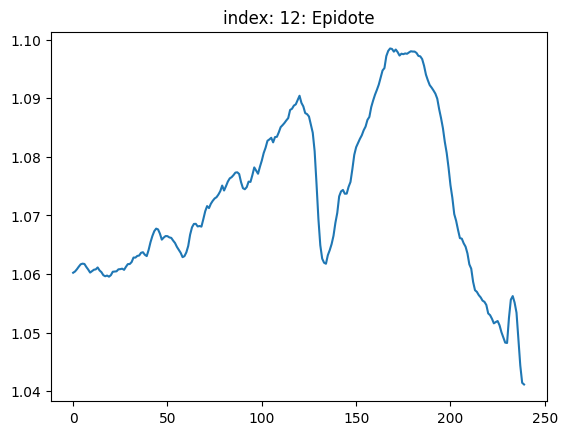

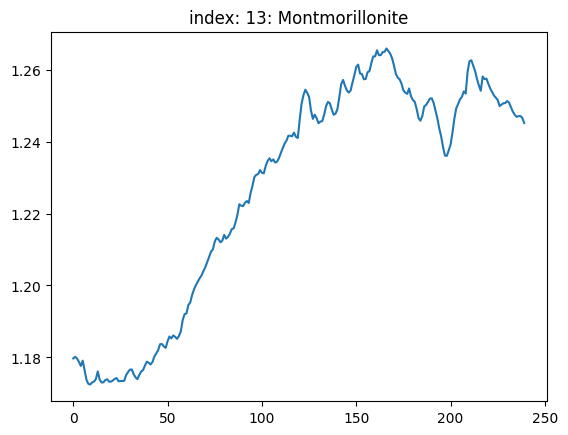

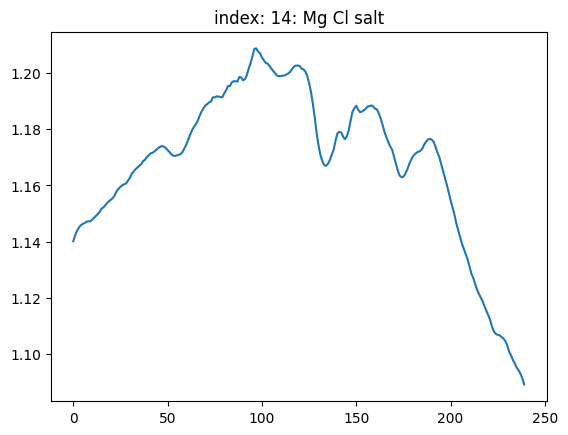

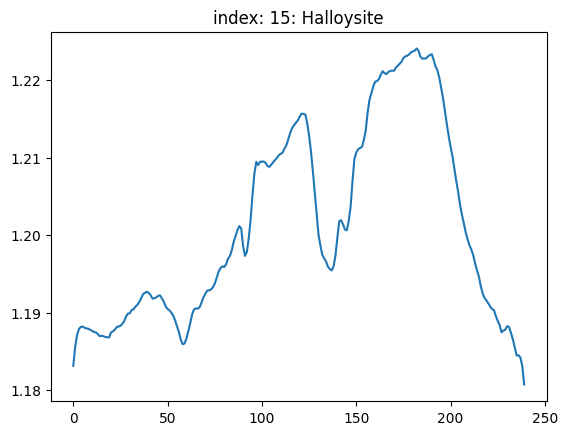

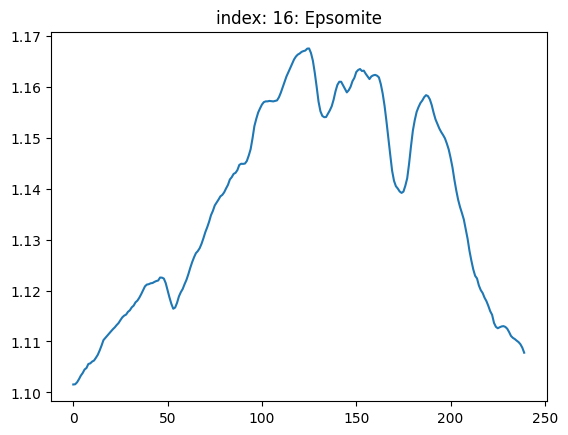

Illite/Muscovite has no spectra


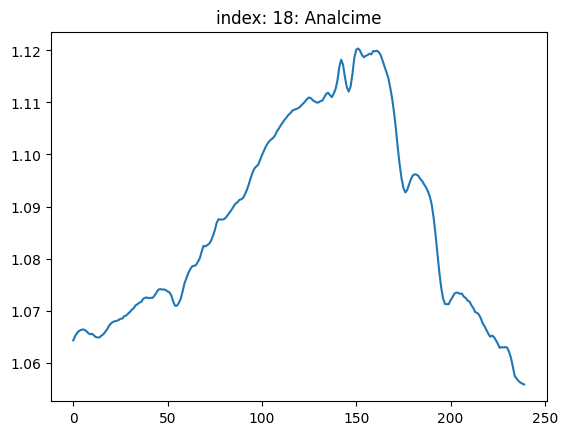

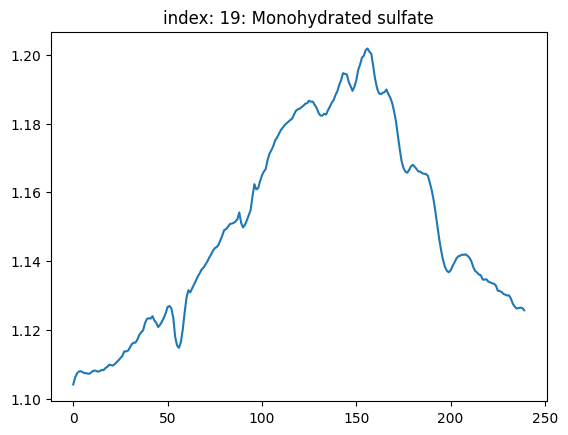

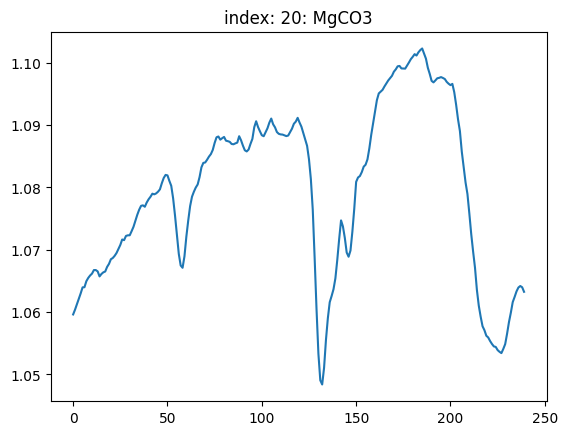

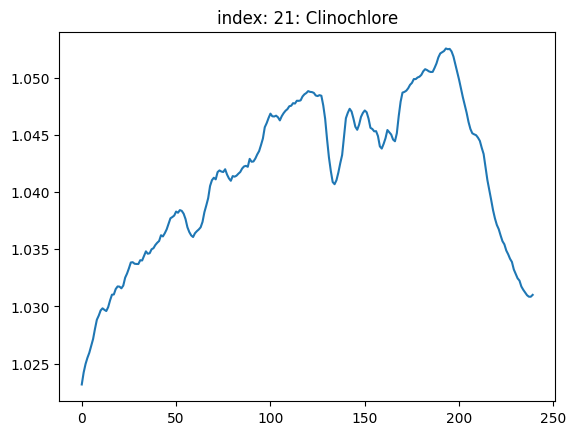

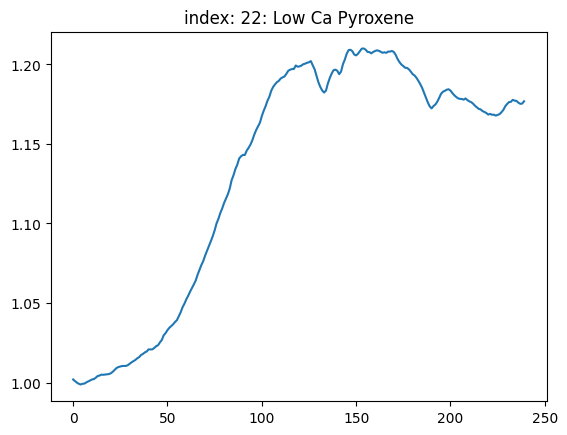

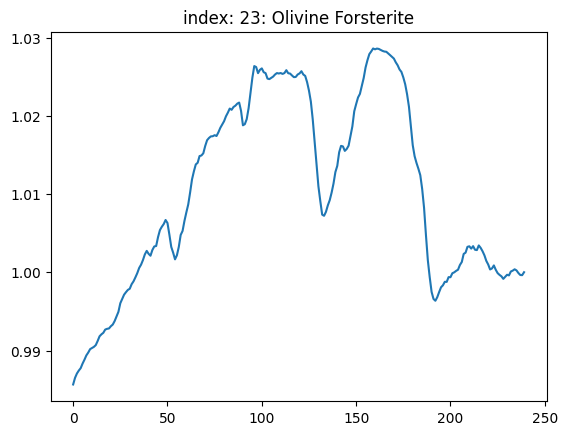

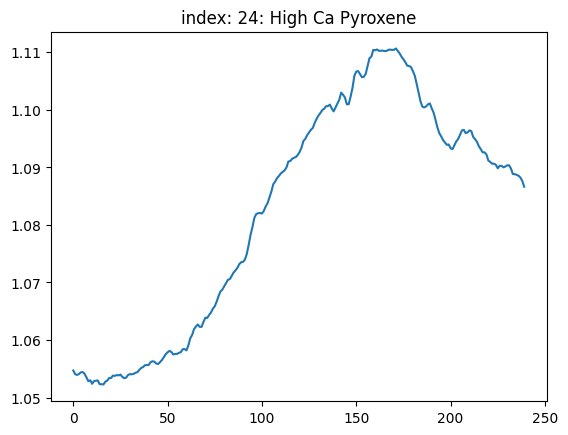

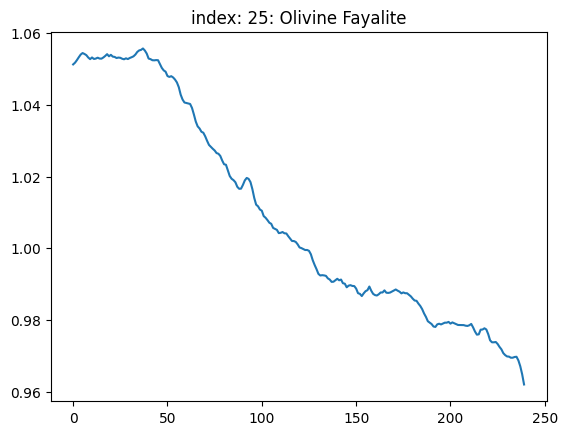

KeyError: 26

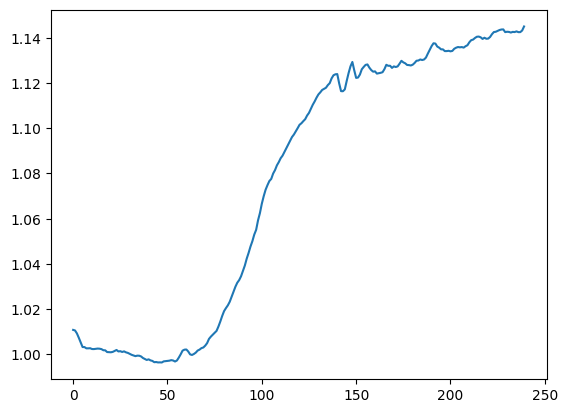

In [8]:
from scipy.signal import savgol_filter
exem_library = []
for i in range(1, 27):
    l = len(master_spectra[i])
    if l != 0:
        sp = np.mean(master_spectra[i][:5,4:244], axis=0)
        sp = savgol_filter(sp, 9, 3)
        plt.plot(sp)
        plt.title(f'index: {i}: {NEW_NAMES[i]}')
        plt.show()
        exem_library.append(sp)
    else:
        print(NEW_NAMES[i], "has no spectra")

In [22]:
my_list = master_spectra
flat_list = [num for sublist in my_list for num in sublist]


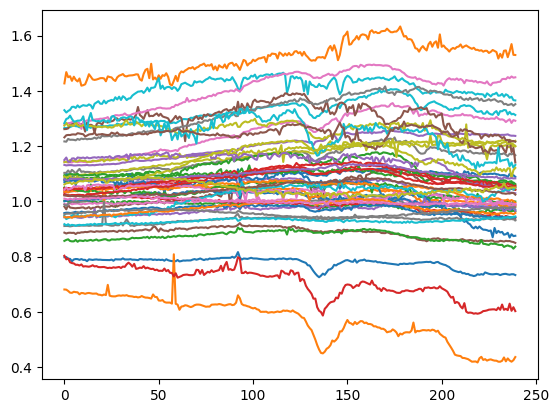

In [24]:
for i in range(1, len(flat_list), 10000):
    plt.plot(flat_list[i][4:244])

In [35]:
from tqdm import tqdm
from scipy.signal import savgol_filter
from scipy.ndimage.filters import uniform_filter1d as filter1d
from tqdm import tqdm

def eliminate_unremarkable_spectra(data):
        threshold = 0.01  # 1% threshold for the smallest value
        # data = savgol_filter(data,11,2)
        smallest_value = np.min(data)
        # Check if the smallest value is less than the threshold
        if smallest_value >= 0.99:
            # Unremarkable
            return False
        return True

flat_list = np.array(flat_list)

normalised_spectra = []
for i in tqdm(range(len(flat_list))):
    spectra = flat_list[i][4:244]
    spectra = (spectra - np.min(spectra)) / (np.max(spectra) - np.min(spectra))
    spectra = savgol_filter(spectra,9,2)
    if eliminate_unremarkable_spectra(spectra):
        normalised_spectra.append(spectra)


normalised_spectra = np.array(normalised_spectra)
print(normalised_spectra.shape)


    

C:\Users\jourd\AppData\Local\Temp\ipykernel_23768\2310555078.py:3: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d as filter1d
 51%|█████▏    | 252960/492835 [00:58<00:56, 4250.79it/s]C:\Users\jourd\AppData\Local\Temp\ipykernel_23768\2310555078.py:21: RuntimeWarning: invalid value encountered in divide
  spectra = (spectra - np.min(spectra)) / (np.max(spectra) - np.min(spectra))
100%|██████████| 492835/492835 [01:54<00:00, 4316.64it/s]


(492835, 240)


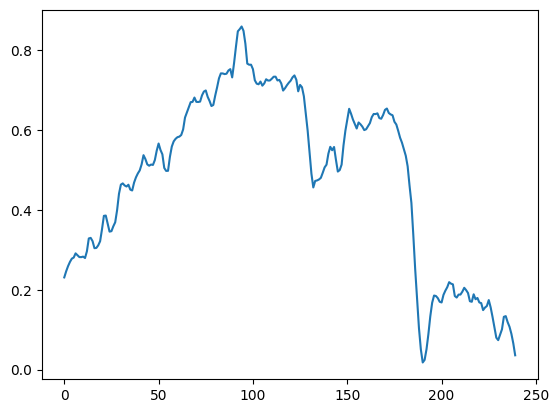

In [50]:
plt.plot(normalised_spectra[220500])

In [11]:
from scipy.signal import savgol_filter
from scipy.ndimage.filters import uniform_filter1d as filter1d
import tqdm as tqdm
def eliminate_unremarkable_spectra(data):
        threshold = 0.01  # 1% threshold for the smallest value
        # data = savgol_filter(data,11,2)
        smallest_value = np.min(data)
        # Check if the smallest value is less than the threshold
        if smallest_value >= 0.99:
            # Unremarkable
            return False
        return True
nw_arr = []
for i in (flat_list):
    if eliminate_unremarkable_spectra(i):

        nw_arr.append(savgol_filter(i[4:244], 9,2))
nw_arr = np.asarray(nw_arr)
print(nw_arr.shape)

C:\Users\jourd\AppData\Local\Temp\ipykernel_30644\1781848484.py:2: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d as filter1d


(459017, 240)


In [59]:
# check if normalied spectra have nan
normalised_spectra = normalised_spectra[~np.isnan(normalised_spectra).any(axis=1)]



In [62]:
for i in range(len(normalised_spectra)):
    if np.isnan(normalised_spectra[i]).any():
        print("poop")

In [63]:
def write_to_h(ls, location):
        df = pd.DataFrame(ls)
        store = pd.HDFStore('ratio_training2.h5')
        store['data'] = df
        store.close()
write_to_h(normalised_spectra, 'ratio_training2.h5')


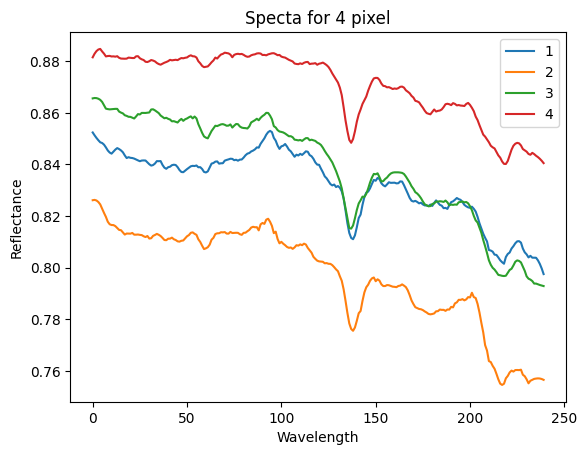

In [163]:
pixel1 = nw_arr[1003]
pixel2 = nw_arr[1004]
pixel3 = nw_arr[1005]
pixel4 = nw_arr[1006]

pixel = np.asarray([pixel1, pixel2])

plt.plot(pixel1, label = '1')
plt.plot(pixel2, label = '2')
plt.plot(pixel3,    label = '3')
plt.plot(pixel4, label = '4')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Specta for 4 pixel')
plt.legend()
plt.savefig('spectra_for_4_pixels.png', dpi = 300)

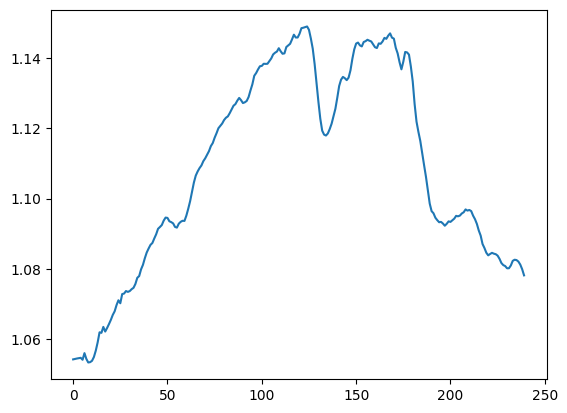

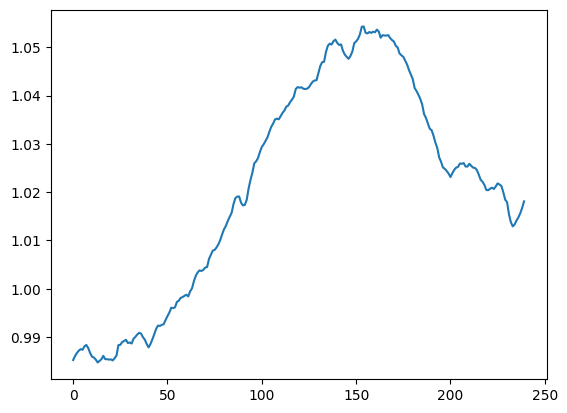

In [243]:
pixel1 = nw_arr[400000]
pixel2 = nw_arr[411162]
plt.plot(pixel1)
plt.show()
plt.plot(pixel2)
pixel = np.array([pixel1, pixel2])

In [50]:
from spectral.io import envi
from scipy.signal import savgol_filter

img = envi.open(r'C:\Users\jourd\OneDrive\Documents\UCL\Masters_Dissertation\Python\Crism_ml_validation\crism_ml-master\ratio_test.hdr')
img = img.load()
img_smooth = np.zeros((img.shape[0],img.shape[1],img.shape[2]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
       img_smooth[i,j] = savgol_filter(img[i,j], 9, 2)

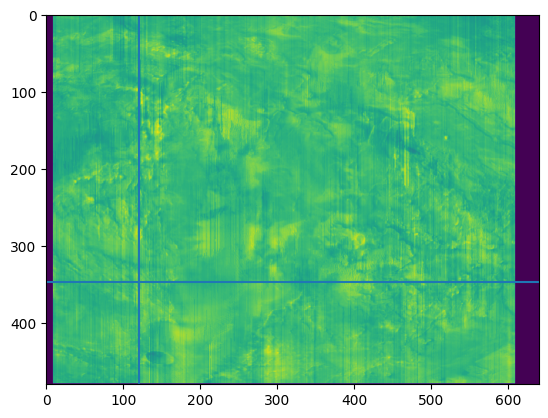

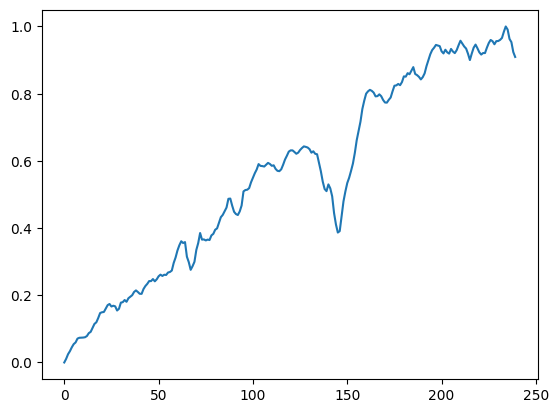

In [389]:
y = 120
x = 347
plt.imshow(img[:,:,10])
plt.axhline(x)
plt.axvline(y)
plt.show()
# plt.show()
# plt.plot(img_smooth[x,y])
# plt.show()
# plt.plot(exem_library[14])


map_pixel = img_smooth[x,y][4:244]

map_pixel = (map_pixel - np.min(map_pixel)) / (np.max(map_pixel) - np.min(map_pixel))
for i in range(len(exem_library)):
    exem_library[i] = (exem_library[i] - np.min(exem_library[i])) / (np.max(exem_library[i]) - np.min(exem_library[i]))
mineral = exem_library[14]

plt.plot(map_pixel)
# plt.plot(mineral)
plt.show()
# plt.plot(t1)

pixel = np.asarray([t,t1])

In [390]:
from GANModel_1d import GANModel_1d
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity as cosineDist

obj = GANModel_1d(img_rows=240, dropout=0.0, genFilters=250, disFilters=20,
                    filterSize=11)
dis1 = obj.disModel_CV_L6s2()

'Get the pre-trained weights'
dis1.load_weights(('dis_cR_100.h5'))
# dis1.load_weights(('dis_cR_40.h5'))
# dis1.load_weights(('dis_cR_75.h5'))

disRep = obj.disModel_CV_L6s2_rep(dis1)
val = []
for b in exem_library:
    pixel = np.asarray([b,map_pixel])
    pred = np.asarray(disRep.predict(pixel))
    
    pred = np.asarray(disRep.predict(pixel))

    sim = (cosineDist(pred[0].reshape(1,-1), pred[1].reshape(1,-1)))
    val.append(sim)


1/1 [==============================] - 0s 28ms/step


[[0.8032304]]


Text(0.5, 1.0, 'Epidote')

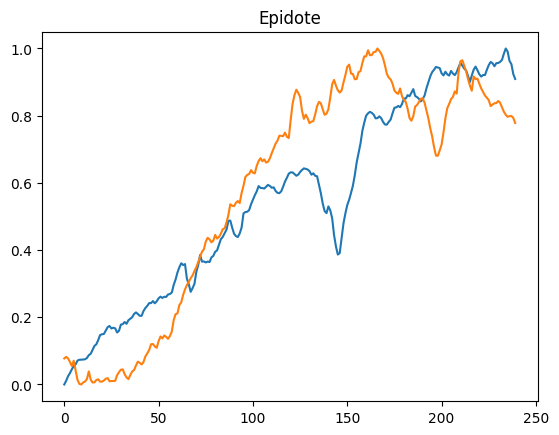

In [391]:
mx = (np.argmax(val))
mx = mx
print(val[mx])
mineral = exem_library[mx]
# Normalise both map_pixel and mineral to 0 and 1
mineral = (mineral - np.min(mineral)) / (np.max(mineral) - np.min(mineral))

plt.plot(map_pixel)
plt.plot(mineral)
plt.title(NEW_NAMES[mx])

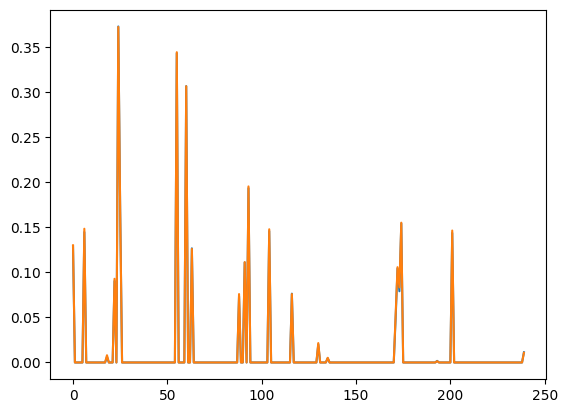

In [234]:
plt.plot(pred[1][4:244])
plt.plot(pred[0][4:244])


In [132]:
pred = np.asarray(disRep.predict(pixel))


1/1 [==============================] - 0s 95ms/step


In [133]:
from sklearn.metrics.pairwise import cosine_similarity as cosineDist

sim = (cosineDist(pred[0].reshape(1,-1), pred[1].reshape(1,-1)))
sim2 = (cosineDist(pixel[0].reshape(1,-1), pixel[1].reshape(1,-1)))
print(sim, sim2)

[[0.96525985]] [[0.99830201]]


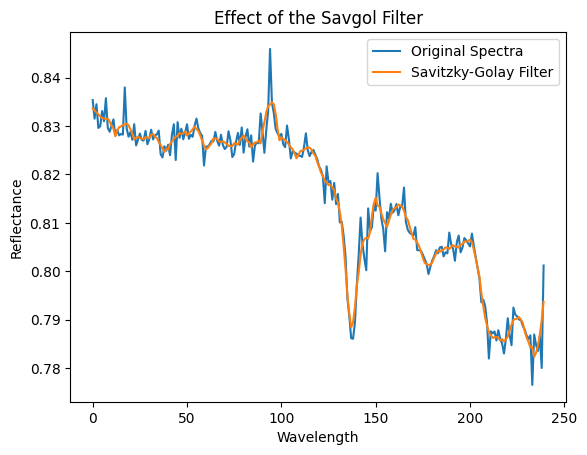

In [182]:
t = spectra[10000][4:244]
t1 = savgol_filter(spectra[10000][4:244], 11,2)

plt.plot(t, label = 'Original Spectra')
plt.plot(t1, label = 'Savitzky-Golay Filter')
plt.legend()
plt.title('Effect of the Savgol Filter')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.savefig('Savgol_Filter_combined.png', dpi = 300)

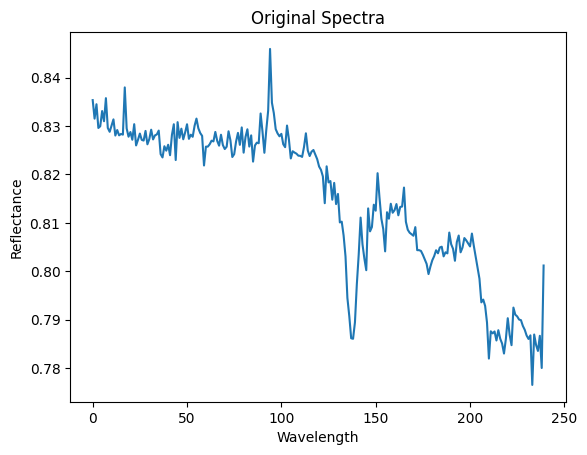

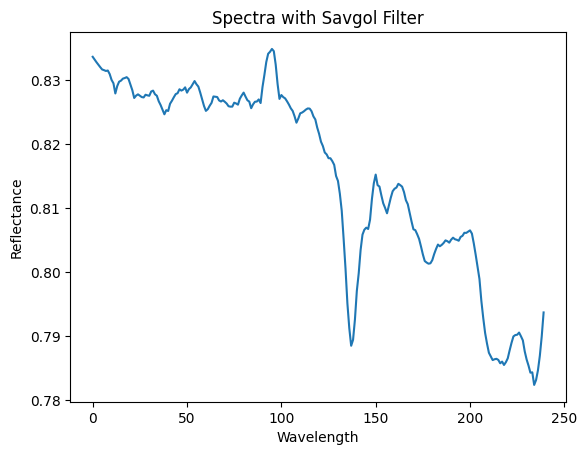

In [181]:
plt.plot(t, label = 'Original Spectra')
plt.title('Original Spectra')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.savefig('Original Spectra.png', dpi = 300)
plt.show()

plt.plot(t1, label = 'Reconstructed Spectra')
plt.title('Spectra with Savgol Filter')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.savefig('Savgol Filter.png', dpi = 300)

In [28]:
exem_library = np.asarray(exem_library)

envi.save_image("exem_library.hdr", exem_library, interleave="bil")

ImageArray([[[0.92176205]
             [0.92172354]
             [0.92083776]
             [0.9205893 ]
             [0.9204616 ]
             [0.92078876]
             [0.920915  ]
             [0.92113364]
             [0.9211262 ]
             [0.92112726]
             [0.9211126 ]
             [0.9219768 ]
             [0.9223877 ]
             [0.9229042 ]
             [0.9208647 ]
             [0.9199111 ]
             [0.9194965 ]
             [0.91978544]
             [0.91966766]
             [0.9193733 ]
             [0.91755503]
             [0.9163476 ]
             [0.9173499 ]
             [0.91814786]
             [0.916949  ]
             [0.91648084]
             [0.91806525]
             [0.9182932 ]
             [0.91813534]
             [0.91675556]
             [0.91747063]
             [0.91693324]
             [0.91758853]
             [0.9177604 ]
             [0.9183982 ]
             [0.9186211 ]
             [0.9181725 ]
             [0.9169306 ]
            

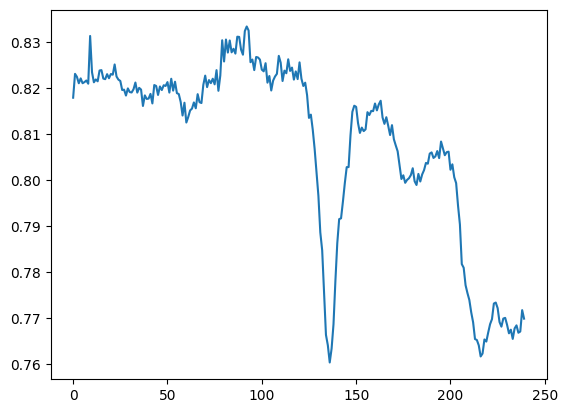

In [56]:
plt.plot(exemplar_library[0][9,4:244])

KeyError: 0

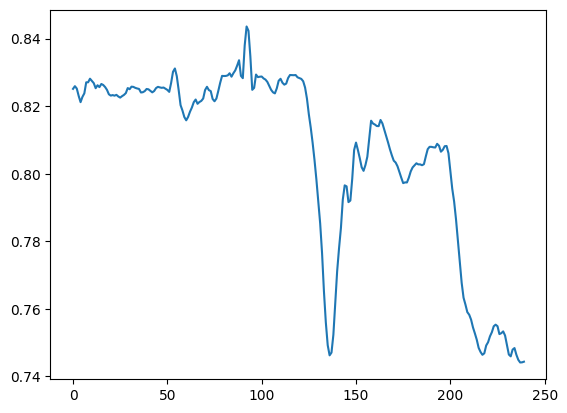

In [71]:
from scipy.signal import savgol_filter
for i in range(len(exemplar_library)):
    plt.plot(savgol_filter(exemplar_library[i][0,4:244],9,5))
    plt.title(NEW_NAMES[i])
    plt.show()